# TITANIC DATASET : Survival Prediction

Objective : Predict survival rate

In [33]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

In [34]:
#Loaded data into Table Titanic using MySQL import option
#establishing the connection between SQL and Jupyter

cnx=mysql.connector.connect(
host='localhost',
port=3306,
user='root',
password='smriti',
database='projects')


In [12]:
#Accessing data in python for Analysis

df=pd.read_sql_query('select * from titanic_ship',cnx)
df
df.head(10)

,PassangerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,0,Name,Sex,0,0,0,Ticket,0.0000,Cabin,Emb
1,1,0,3,Braund. Mr. Owen Har,male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,Cumings. Mrs. John B,female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,Heikkinen. Miss. Lai,female,26,0,0,STON/O2. 310128,7.9250,,S
4,4,1,1,Futrelle. Mrs. Jacqu,female,35,1,0,113803,53.1000,C123,S
5,5,0,3,Allen. Mr. William H,male,35,0,0,373450,8.0500,,S
6,6,0,3,Moran. Mr. James,male,0,0,0,330877,8.4583,,Q
7,7,0,1,McCarthy. Mr. Timoth,male,54,0,0,17463,51.8625,E46,S
8,8,0,3,Palsson. Master. Gos,male,2,3,1,349909,21.0750,,S
9,9,1,3,Johnson. Mrs. Oscar,female,27,0,2,347742,11.1333,,S


In [13]:
# Refering sample data

df.tail(10)

,PassangerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
882,882,0,3,Markun. Mr. Johann,male,33,0,0,349257,7.8958,,S
883,883,0,3,Dahlberg. Miss. Gerd,female,22,0,0,7552,10.5167,,S
884,884,0,2,Banfield. Mr. Freder,male,28,0,0,C.A./SOTON 3406,10.5000,,S
885,885,0,3,Sutehall. Mr. Henry,male,25,0,0,SOTON/OQ 392076,7.0500,,S
886,886,0,3,Rice. Mrs. William (,female,39,0,5,382652,29.1250,,Q
887,887,0,2,Montvila. Rev. Juoza,male,27,0,0,211536,13.0000,,S
888,888,1,1,Graham. Miss. Margar,female,19,0,0,112053,30.0000,B42,S
889,889,0,3,"""Johnston. Miss. Cat",female,0,1,2,W./C. 6607,23.4500,,S
890,890,1,1,Behr. Mr. Karl Howel,male,26,0,0,111369,30.0000,C148,C
891,891,0,3,Dooley. Mr. Patrick,male,32,0,0,370376,7.7500,,Q


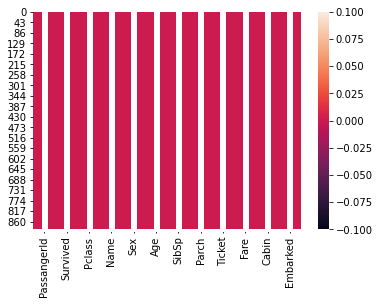

In [15]:
#Checking the Null values in the table

sns.heatmap(df.isnull(),annot=True)
plt.show()

# No Nulls found instead .csv file had blank space which is not acknowledged as NULL
#mysql> select count(*) from titanic_ship where cabin like '% %';
+----------+
| count(*) |
+----------+
|       24 |
+----------+
#1 row in set (0.00 sec)

In [18]:
#another method to check null values

df.isnull().sum()

PassangerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [20]:
#total rows and column in dataset

df.shape

(892, 12)

In [21]:
df.describe()

,PassangerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,445.500000,0.383408,2.306054,23.783632,0.522422,0.381166,32.168100
std,257.642517,0.486489,0.839170,17.609788,1.102264,0.805706,49.677221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,6.000000,0.000000,0.000000,7.895800
50%,445.500000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.250000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329000


Data Analysis of Dataset

In [28]:
# Sex ratio of survival

Sex_ratio={'male':0, 'Female':1}
print(Sex_ratio)

{'male': 0, 'Female': 1}


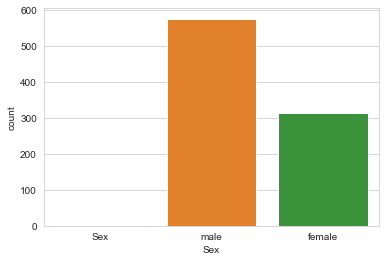

In [45]:
#Graphical presentation of Sex ratio
sns.countplot(x='Sex',data=df)

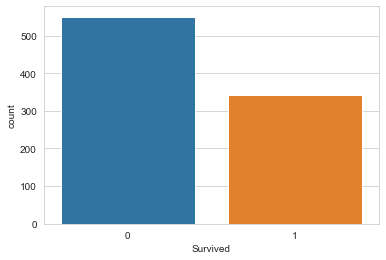

In [44]:
# Graph representation of number of survivals based on "Survived" Column
sns.countplot(x='Survived',data=df)

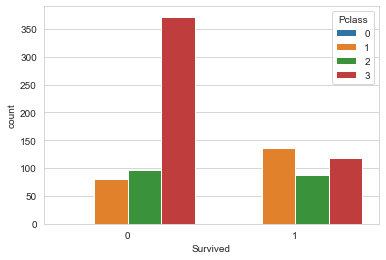

In [49]:
#PClass Column wise Survival Rate
#number of Pclass population survived
sns.countplot(x='Survived',hue='Pclass',data=df)

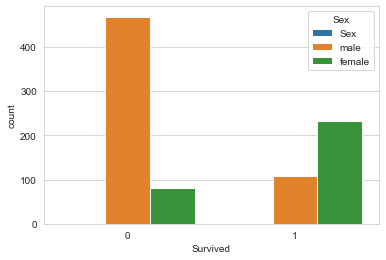

In [51]:
#Gender Wise Survival Rate
#Gender ratio Represntation
sns.countplot(x='Survived',hue='Sex',data=df)

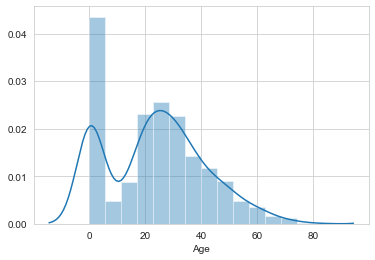

In [53]:
#Age Wise Survival rate
sns.distplot(df['Age'])

# Logistic Regression for Prediction

In [70]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,y_train,X_test,y_test= train_test_split(df('Survived',axis=1),
                                                test_size=0.20,randaom_stat=89)

TypeError: 'DataFrame' object is not callable

In [60]:
from sklearn.linear_model import LogisticRegression

In [69]:
model=LogisticRegression()
model.fit(X_df,y_df)


NameError: name 'X' is not defined